

# Project: Investigate a Dataset [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Overview and Notes
    This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    ● ‘Neighborhood’ indicates the location of the hospital.
    ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    ● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and     ‘Yes’ if they did not show up.

    

we will try to understand What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment . 

  



In [215]:
# import statements for all of the packages that you plan to use.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling






In [216]:
# Load data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [217]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [218]:
df.shape

(110527, 14)

We use shape to get the number of rows and columns.


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We use info() function to see the the names of columns and their data types.
and if there is null value or no 


In [220]:
df = df.rename(columns = {'No-show' : 'No_show'} )
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


In [221]:
#check if any rows dublicated
sum(df.duplicated())

0

In [222]:
df.drop(['PatientId' , 'AppointmentID' , 'ScheduledDay' ,'AppointmentDay'] , axis = 1 , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# <a id='eda'></a>
## Exploratory Data Analysis



# Data overview

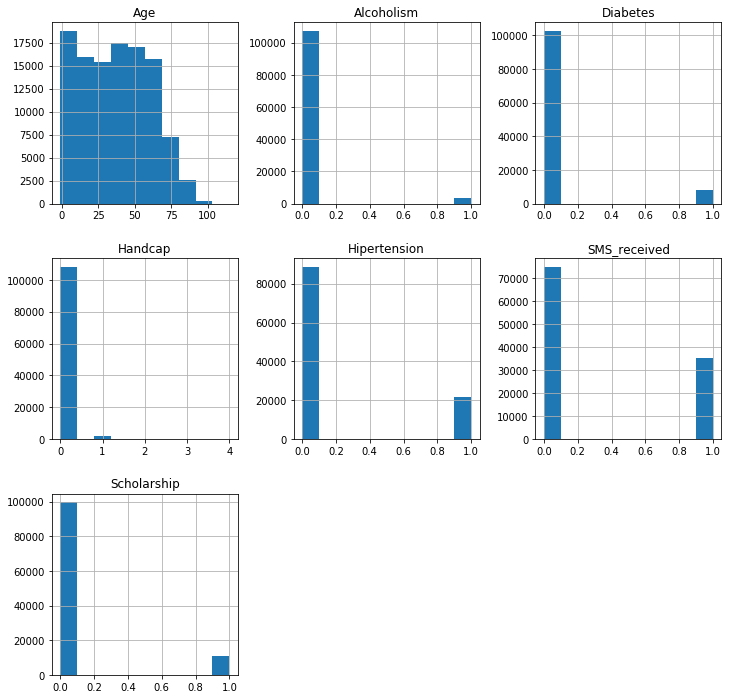

In [223]:
df.hist(figsize=(12,12)) ; 

what percentage of patients did not show up for their appointment

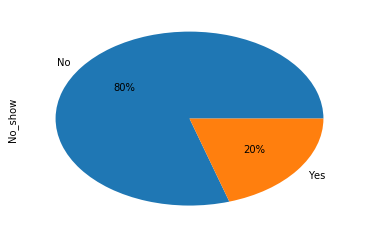

In [224]:
df['No_show'].value_counts().plot(kind = 'pie' , autopct='%1.0f%%') ; 

In [225]:
no = df.No_show == 'No'
df[no].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hipertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [226]:
yes = df.No_show == 'Yes'
df[yes].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hipertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

In [227]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [228]:
def plot(width , height , col , x_label , y_label , title ):
    plt.figure(figsize=[width,height])
    df.groupby(['No_show'])[col].value_counts().plot(kind = "bar")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title);

# Is the gender affect on patients showing up?

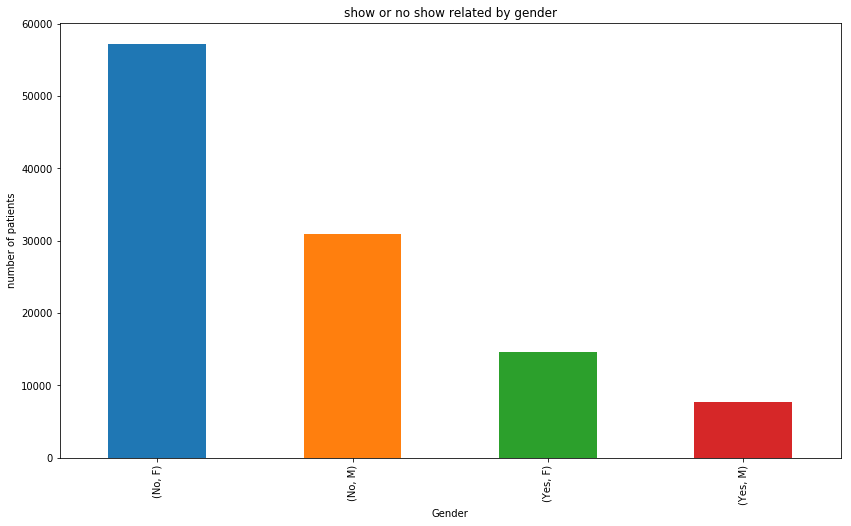

In [229]:
plt.figure(figsize=[14,8])
df.groupby(['No_show']).Gender.value_counts().plot(kind = "bar")
plt.xlabel('Gender')
plt.ylabel('number of patients')
plt.title('show or no show related by gender');


Gender has no explicit relationship

# Is the scholarship affect on patients showing up?

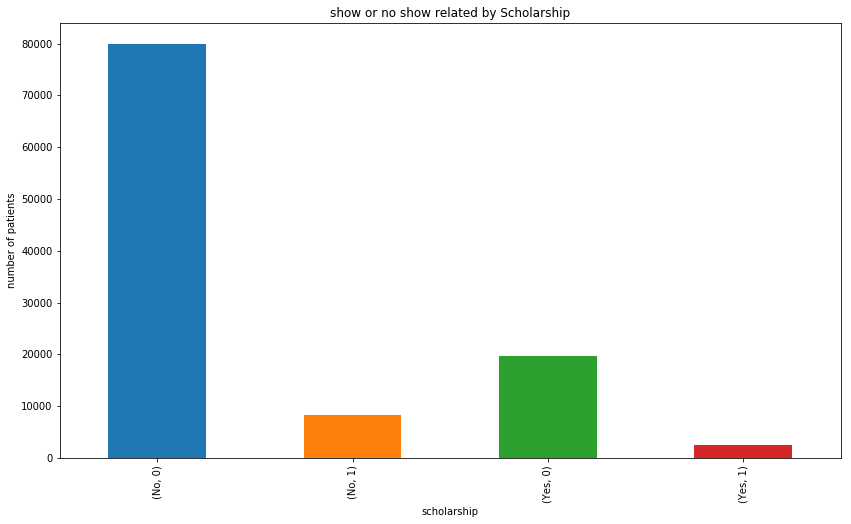

In [230]:
plot(14 , 8 , 'Scholarship' , 'scholarship' , 'number of patients' , 'show or no show related by Scholarship' );

Scholarship has no explicit relationship


# If patients have a hipertension, is that effect patients showing up ?

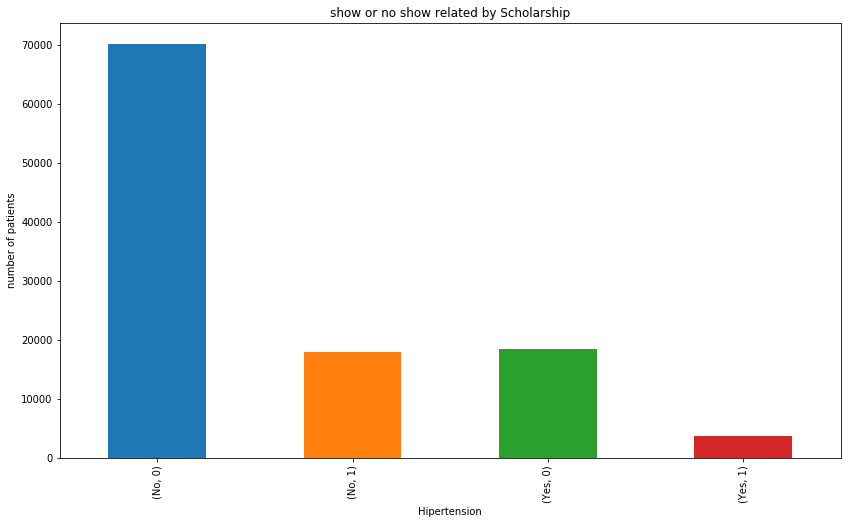

In [231]:
plot(14 , 8 , 'Hipertension' , 'Hipertension' , 'number of patients' , 'show or no show related by Scholarship' );

 Hipertension has no explicit relationship

# If patients have a Diabetes, is that effect patients showing up ?

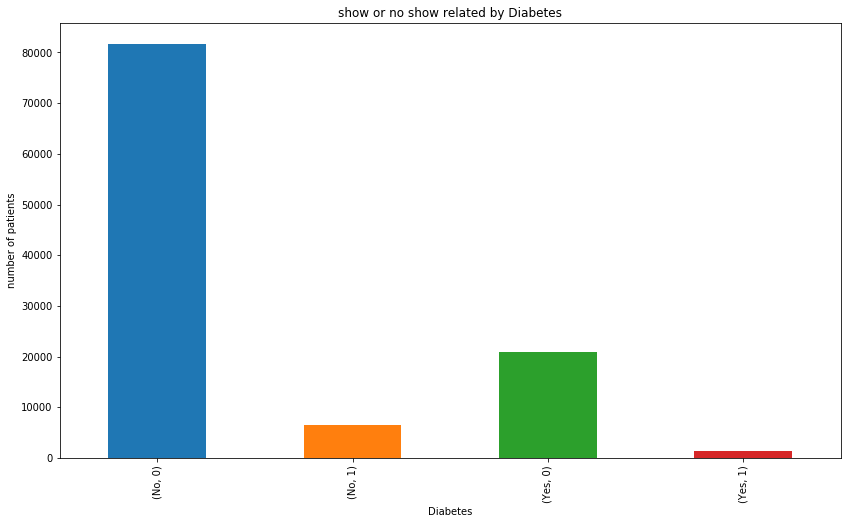

In [232]:
plot(14 , 8 , 'Diabetes' , 'Diabetes' , 'number of patients' , 'show or no show related by Diabetes' );

Diabetes has no explicit relationship

# If patients have a Alcoholism, is that effect patients showing up ?

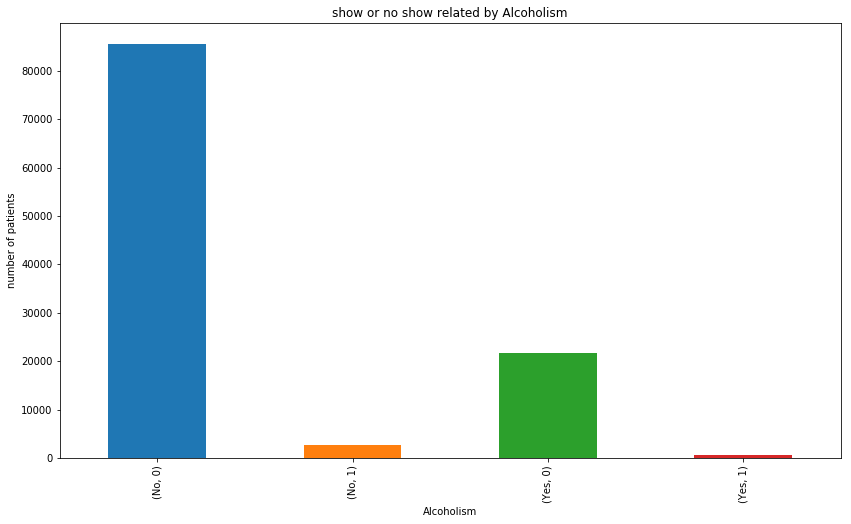

In [233]:
plot(14 , 8 , 'Alcoholism' , 'Alcoholism' , 'number of patients' , 'show or no show related by Alcoholism' );

Alcoholism has no explicit relationship

# If patients have a Handcap, is that effect patients showing up ?

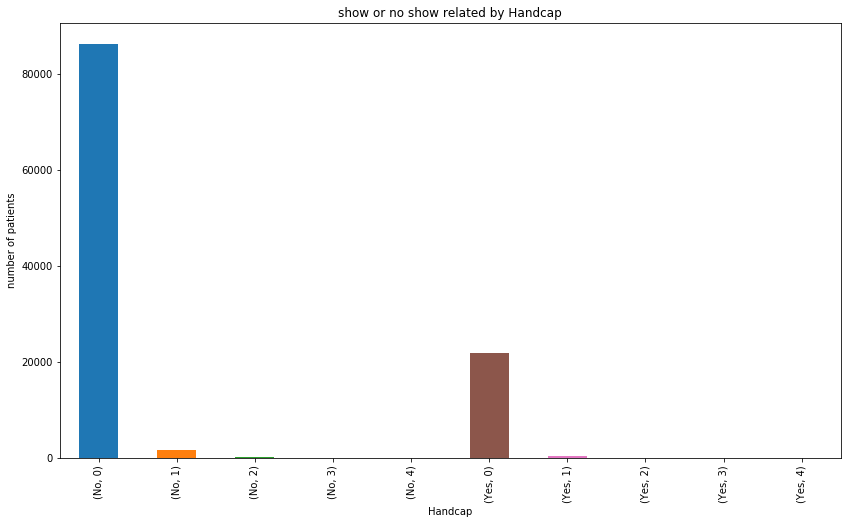

In [234]:
plot(14 , 8 , 'Handcap' , 'Handcap' , 'number of patients' , 'show or no show related by Handcap' );

Handcap has no explicit relationship

# Is the SMS_received affect on patients showing up?

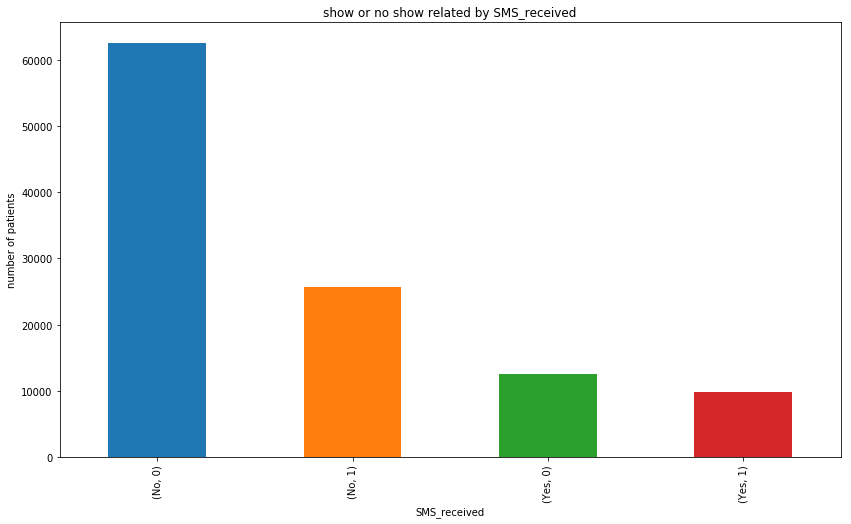

In [235]:
plot(14 , 8 , 'SMS_received' , 'SMS_received' , 'number of patients' , 'show or no show related by SMS_received' );

SMS_received has no explicit relationship

# Is the Age affect on patients showing up?

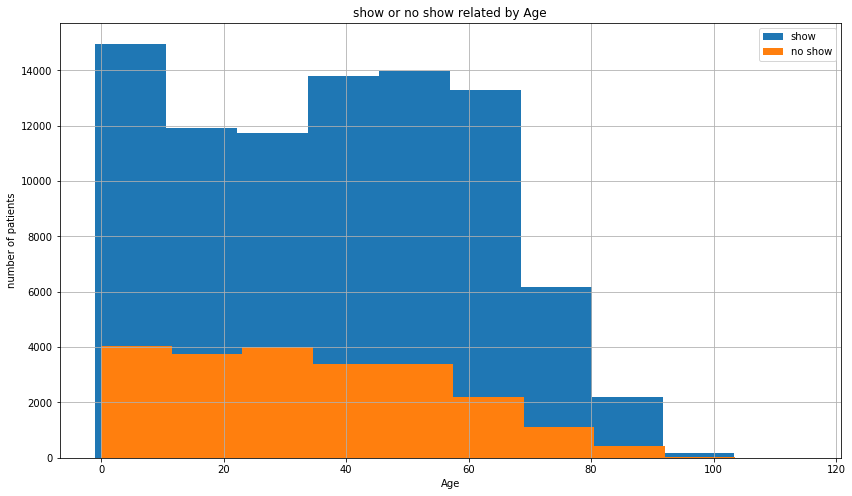

In [236]:
plt.figure(figsize=[14,8])
df.Age[no].hist(alpha = 1, label = 'show')
df.Age[yes].hist(alpha = 1 , label = 'no show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('number of patients')
plt.title('show or no show related by Age');



Patients from 0 to 10 years old are the most frequent patients
Patients over 70 years of age are less present

# Is the Neighbourhood affect on patients showing up?

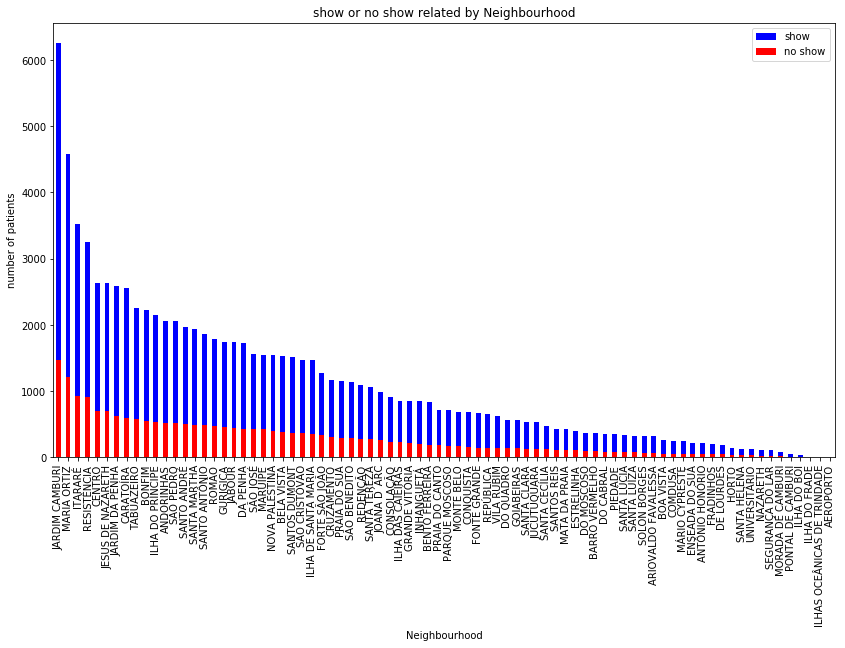

In [237]:
plt.figure(figsize=[14,8])
df.Neighbourhood[no].value_counts().plot(kind = "bar" , color = 'blue' , label = 'show')
df.Neighbourhood[yes].value_counts().plot(kind = "bar" , color = 'red' , label = 'no show')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('number of patients')
plt.title('show or no show related by Neighbourhood');



Neighbourhood It has a great impact on showing up at the clinic

<a id='conclusions'></a>
## Conclusions

    There are no clear factors to determine whether the patient will show up or not at the scheduled time 

    However, there are some factors that may be relied upon but not to a large extent such as
    
    1 - Neighbourhood It has a great impact on showing up at the clinic
    2 - Patients from 0 to 10 years old are the most frequent patients

### Limitations
    can not show strong correlations between factors 



In [238]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0